#Analyze pivots

In [11]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw969'))
from uw.like2.analyze import (sourceinfo,); 
map(reload, (sourceinfo,))

[<module 'uw.like2.analyze.sourceinfo' from '/afs/slac/g/glast/groups/catalog/pointlike/python/uw/like2/analyze/sourceinfo.pyc'>]

unpacking file /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_6years/uw969/pickle.zip ... found 1728 *.pickle files in folder pickle
saved sources.pickle
Pivot needs fixing: 0 sources


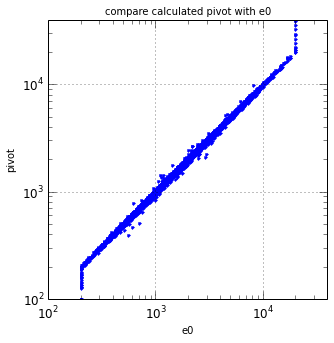

In [12]:
self = sourceinfo.SourceInfo()
self.pivot_vs_e0();

In [13]:
df = self.df
ts10 = df.ts>10
offset = df.pivot_energy/df.e0-1.0
df['offset'] = offset
not_converged = ts10 & ((abs(offset)>0.3) &(df.e0<19999) & (df.e0>201) |
                         (df.e0>19999) & (df.pivot_energy<df.e0*0.95) 
                        | (df.e0<201) & (df.pivot_energy>df.e0*1.05)
                       )
print sum(not_converged)
tofix=df[not_converged]['ts pivot_energy e0 offset roiname'.split()].sort_index(by='roiname')

roinames=sorted(list(set(tofix.roiname)))
rois = np.array([int(n[5:]) for n in roinames]); len(rois), rois

0


(0, array([], dtype=float64))

In [10]:
tofix

,ts,pivot_energy,e0,offset,roiname
name,,,,,
P86Y0210,24.14674,6914.258,4639.807,0.4902039,HP12_1652


saved truncated csv version to "sources_uw969.csv"
Saving fig cumulative_ts, ... to plots/sources/cumulative_ts_uw969.jpg
34 sources with bad fits
34 sources with missing errors
wrote file plots/sources/badfits.htm
fit quality averages: powerlaw: 10.1, logparabola: 8.5, expcutoff(hilat): 8.6, expcutoff(lolat): 15.5
wrote file plots/sources/poorfit.htm
46 sources flagged (2) as poor fits
Saving fig fit_quality, ... to plots/sources/fit_quality_uw969.jpg
Tagged 14 sources with lowebad, abs(pull0)>3, bit (4)
Saving fig spectral_fit_consistency_plots, ... to plots/sources/spectral_fit_consistency_plots_uw969.jpg
Saving fig poor_fit_positions, ... to plots/sources/poor_fit_positions_uw969.jpg
wrote file plots/sources/pulsar_tails.htm
69 sources flagged (1) in tails of flux, index, or beta
Saving fig non_psr_spectral_plots, ... to plots/sources/non_psr_spectral_plots_uw969.jpg
Saving fig beta_check, ... to plots/sources/beta_check_uw969.jpg
14 pulsar sources flagged (1) in tails of  index or

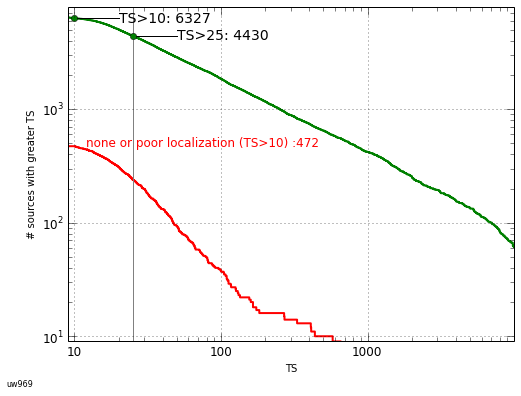

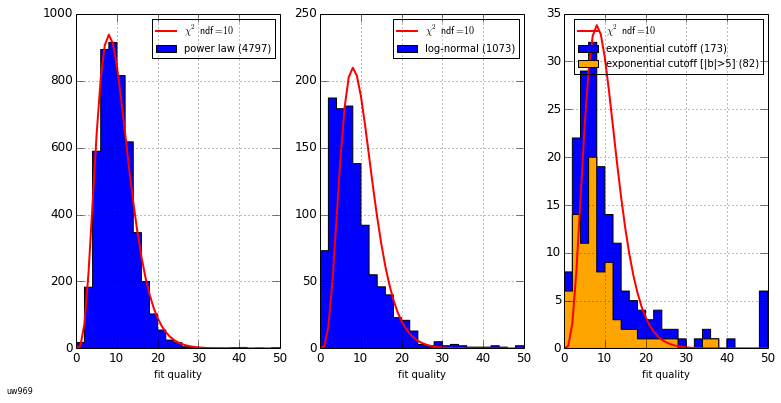

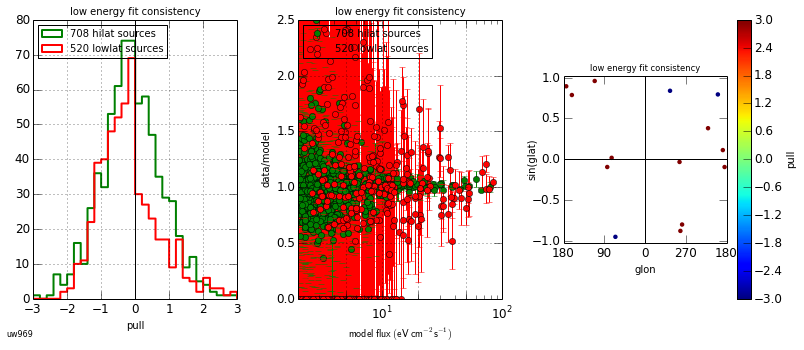

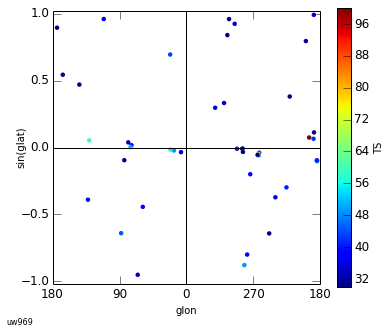

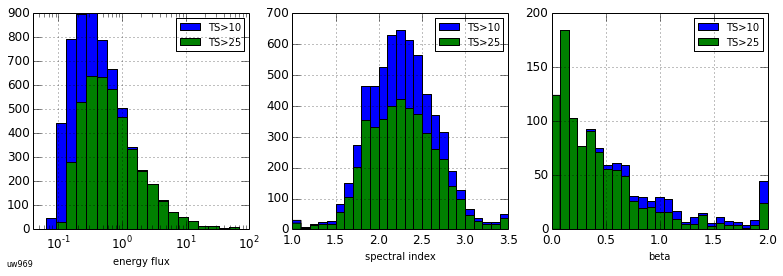

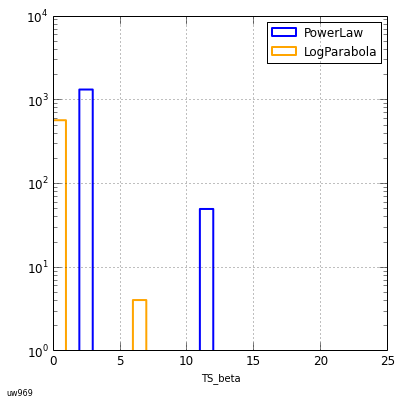

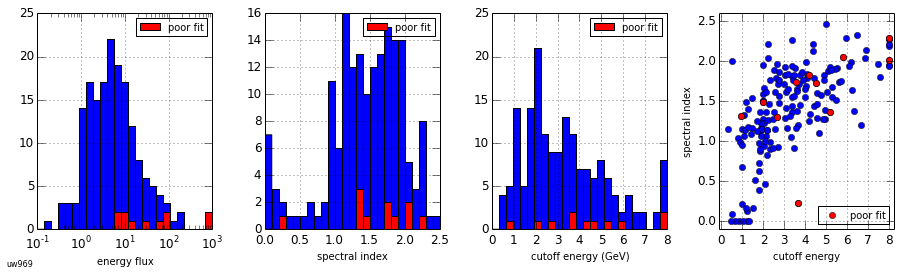

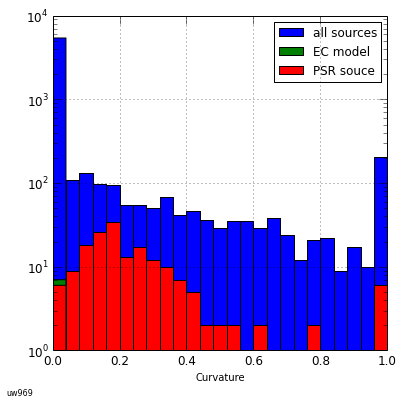

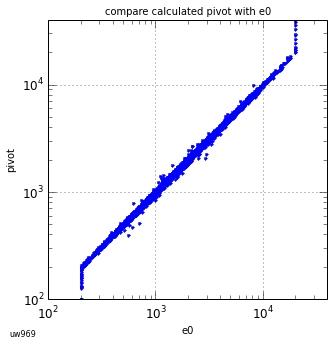

In [14]:
self.all_plots()